<a href="https://colab.research.google.com/github/03Yuma/Machine_Learning/blob/main/Jobsheet11_T1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [3]:
# Muat dataset CIFAR-10
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [4]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [5]:
# Definisikan model CNN dengan batch normalization
model = models.Sequential([
    layers.Conv2D(64, (3, 3), padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(10)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Kompilasi model
model.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy'])

In [7]:

# Data augmentation
data_augmentation = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

In [8]:

# Latih model dengan data augmentation dan epoch 10
history = model.fit(data_augmentation.flow(train_images, train_labels, batch_size=64),
                    epochs=15,
                    validation_data=(test_images, test_labels))

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 976s 1s/step - accuracy: 0.3985 - loss: 1.8134 - val_accuracy: 0.5760 - val_loss: 1.2261
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 1002s 1s/step - accuracy: 0.6185 - loss: 1.0729 - val_accuracy: 0.5779 - val_loss: 1.2019
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 999s 1s/step - accuracy: 0.6828 - loss: 0.9009 - val_accuracy: 0.7204 - val_loss: 0.8111
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 955s 1s/step - accuracy: 0.7227 - loss: 0.7928 - val_accuracy: 0.7322 - val_loss: 0.7603
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 945s 1s/step - accuracy: 0.7474 - loss: 0.7303 - val_accuracy: 0.7641 - val_loss: 0.6835
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 982s 1s/step - accuracy: 0.7649 - loss: 0.6773 - val_accuracy: 0.7207 - val_loss: 0.8292
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 985s 1s/step - accuracy: 0.7833 - loss: 0.6269 - val_accuracy: 0.7857 - val_loss: 0.6336
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 958s 1s/step - accuracy: 0.7920 - loss: 0.6032 - val_accuracy: 0.75

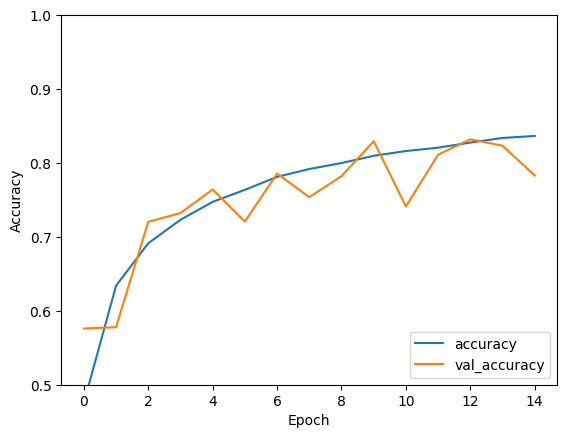

In [9]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [10]:
# Evaluasi model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)

313/313 - 45s - 143ms/step - accuracy: 0.7830 - loss: 0.6849
0.7829999923706055
